In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


In [6]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()])) 

100%|███████████████████████████| 26421880/26421880 [00:31<00:00, 848528.75it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 181309.00it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████| 4422102/4422102 [00:03<00:00, 1115778.94it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 1062089.37it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [20]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Text(0.5, 1.0, '9')

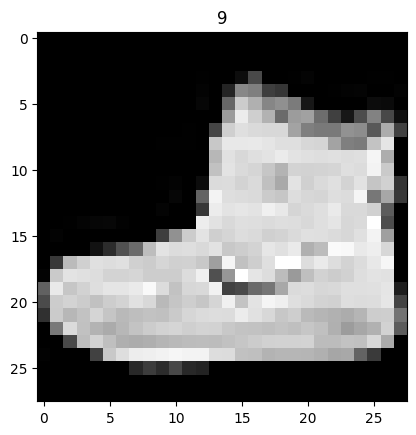

In [49]:
image,label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(label)

In [51]:
image.squeeze().shape

torch.Size([28, 28])

In [22]:
class CNN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,256,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(256,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [27]:
model = CNN4()
model = torch.load("../models/MNIST.pt")
model = model.to(device)

In [28]:
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cdm
def test(model, test_loader):
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
    return correct/total

In [29]:
def cc(model, test_loader):
    with torch.no_grad():
        final = torch.tensor([]).to(device)
        all = torch.tensor([]).to(device)
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            final = torch.concat((final, predicted))
            all = torch.concat((all, labels))
        cm = confusion_matrix(final.cpu(), all.cpu())
        cdm(cm).plot()
    return final

In [30]:
accuracy = test(model, test_loader)

In [31]:
print(accuracy)

0.1287


tensor([2., 0., 1.,  ..., 6., 8., 2.], device='cuda:0')

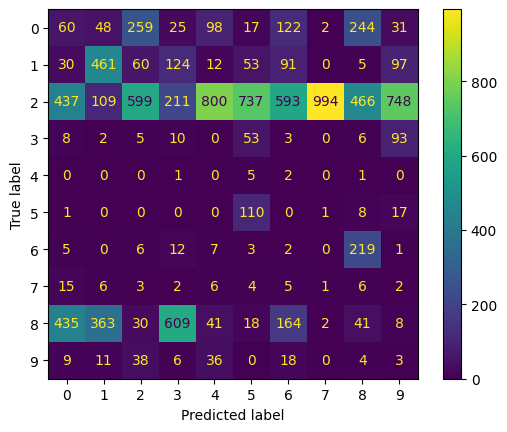

In [32]:
cc(model, test_loader)